In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

In [3]:
df = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')

titanic = df.copy()

In [4]:
titanic.isnull().sum()

passengerId      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [5]:
test_data.isnull().sum()

passengerId      0
pclass           0
name             0
sex              0
age             86
sibsp            0
parch            0
ticket           0
fare             1
cabin          327
embarked         0
dtype: int64

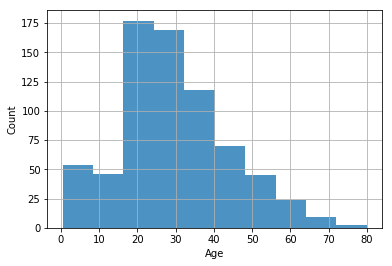

In [6]:
ax = titanic["age"].hist(alpha=0.8)
ax.set(xlabel='Age', ylabel='Count')
plt.show()

In [7]:
titanic.groupby('pclass').mean()

,passengerId,survived,age,sibsp,parch,fare
pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [8]:
titanic.groupby('pclass').median()

,passengerId,survived,age,sibsp,parch,fare
pclass,,,,,,
1,472.0,1.0,37.0,0.0,0.0,60.2875
2,435.5,0.0,29.0,0.0,0.0,14.2500
3,432.0,0.0,24.0,0.0,0.0,8.0500


In [9]:
#reemplazamos los valores faltantes por la mediana de la clase
titanic['age'] = titanic.groupby(['pclass'])['age'].transform(lambda x: x.fillna(x.median()))
test_data['age'] = test_data.groupby(['pclass'])['age'].transform(lambda x: x.fillna(x.median()))

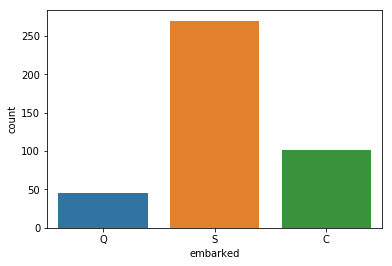

In [10]:
sns.countplot(x = 'embarked', data = test_data)
plt.show()

In [11]:
# Reemplazamos los nulos de 'Embarked' por el puerto más popular
titanic['embarked'].fillna('S', inplace = True)

In [12]:
#Nueva columna para combinar no. padres/hijos y no. hermanos/esposas
titanic['companion'] = [1 if p + s > 0 else 0 for p,s in zip(titanic['parch'], titanic['sibsp'])]
test_data['companion'] = [1 if p + s > 0 else 0 for p,s in zip(test_data['parch'], test_data['sibsp'])]

In [13]:
#Quitamos las columnas que no sirven para el análisis
titanic.drop(columns = ['cabin', 'name','ticket', 'parch', 'sibsp', 'passengerId'], inplace = True)
test_data.drop(columns = ['cabin', 'name','ticket', 'parch', 'sibsp', 'passengerId'], inplace = True)


In [14]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,companion
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [15]:
#Creamos variables dummies para variables categóricas
#Grupo control = (mujer, 1º clase, puerto C)
titanic = pd.get_dummies(titanic, columns = ['pclass', 'sex'], prefix = ['class', 'is'], drop_first = True)
titanic = pd.get_dummies(titanic, columns = ['embarked'], prefix = 'port')
test_data = pd.get_dummies(test_data, columns = ['pclass', 'sex'], prefix = ['class', 'is'], drop_first = True)
test_data = pd.get_dummies(test_data, columns = ['embarked'], prefix = ['port'])



In [16]:
titanic2 = titanic.copy()
test_2 = test_data.copy()

In [20]:
titanic = titanic2.copy()
test_data = test_2.copy()

In [21]:
titanic.drop(columns = 'port_Q', inplace = True)
test_data.drop(columns = 'port_Q', inplace = True)

In [22]:
titanic.head()

,survived,age,fare,companion,class_2,class_3,is_male,port_C,port_S
0,0,22.0,7.2500,1,0,1,1,0,1
1,1,38.0,71.2833,1,0,0,0,1,0
2,1,26.0,7.9250,0,0,1,0,0,1
3,1,35.0,53.1000,1,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,1,0,1


#### Logit

In [23]:
train, test = train_test_split(titanic, test_size = 0.35, random_state = 158999)

In [24]:
y = train['survived']
X = train.drop(columns = ['survived'])

y_test = test['survived']
X_test = test.drop(columns = ['survived'])

In [25]:
logit = sm.Logit(y,X)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.463081
         Iterations 6


In [26]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  579
Model:                          Logit   Df Residuals:                      571
Method:                           MLE   Df Model:                            7
Date:                Mon, 08 Apr 2019   Pseudo R-squ.:                  0.3093
Time:                        09:03:03   Log-Likelihood:                -268.12
converged:                       True   LL-Null:                       -388.17
                                        LLR p-value:                 3.562e-48
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0042      0.007      0.577      0.564      -0.010       0.018
fare           0.0066      0.003      2.037      0.042       0.000       0.013
companion      0.1449      0.244      0.594      0.552      -0.333       0.623
class_2        0.4551      0.316      1.439      0.150      -0.165       1.075
class_3       -0.7923      0.256     -3.091      0.002      -1.295      -0.290
is_male       -2.3744      0.236    -10.045      0.000      -2.838      -1.911
port_C         1.4663      0.425      3.453      0.001       0.634       2.299
port_S         0.7367      0.376      1.960      0.050   -5.93e-05       1.473
==============================================================================
"""

In [27]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X_test)

In [28]:
logreg.score(X_test, y_test)

0.7884615384615384

In [29]:
confusion_matrix(y_test, y_pred)

array([[168,  30],
       [ 36,  78]])

In [30]:
#Quitamos columnas cuyo p-value sea < 0.05

X2 = train.drop(columns = ['survived','fare'])
X2_test = test.drop(columns = ['survived','fare'])

In [31]:
logit_v2 = sm.Logit(y,X2)
logit_model_v2 = logit_v2.fit()

Optimization terminated successfully.
         Current function value: 0.468016
         Iterations 6


In [32]:
logit_model_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  579
Model:                          Logit   Df Residuals:                      572
Method:                           MLE   Df Model:                            6
Date:                Mon, 08 Apr 2019   Pseudo R-squ.:                  0.3019
Time:                        09:03:24   Log-Likelihood:                -270.98
converged:                       True   LL-Null:                       -388.17
                                        LLR p-value:                 8.931e-48
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0062      0.007      0.853      0.394      -0.008       0.020
companion      0.3195      0.226      1.411      0.158      -0.124       0.763
class_2        0.2064      0.295      0.698      0.485      -0.373       0.785
class_3       -1.0466      0.232     -4.507      0.000      -1.502      -0.592
is_male       -2.3689      0.235    -10.077      0.000      -2.830      -1.908
port_C         1.8119      0.401      4.524      0.000       1.027       2.597
port_S         0.9796      0.363      2.699      0.007       0.268       1.691
==============================================================================
"""

In [33]:
logreg_v2 = LogisticRegression()
logreg_v2.fit(X2, y)
y2_pred = logreg_v2.predict(X2_test)

In [34]:
logreg_v2.score(X2_test, y_test)

0.7916666666666666

In [35]:
confusion_matrix(y_test, y2_pred)

array([[168,  30],
       [ 35,  79]])